## The Sparks Foundation - GRIP - Data Science and Business Analytics - MAR'2021

## Task 2 - Prediction using Unsupervised Machine Learning

## Author - Ojasvi Sharma

### Problem Statement : Using the Iris Dataset predict the optimum number of clusters and represent it visually. ####

### Dataset Used - Iris Dataset, Available in sklearn library
- Alternatively it can be downloaded from the following link : https://bit.ly/3kXTdox 

### Steps
- Step 1 - Importing the important liabraries
- Step 2 - Visualizing the data
- Step 3 - Finding the optimim number of cluster
- Step 4 - Applying K means clustering on the data
- Step 5 - Finaly visualizing the clusters

### Importing the required libraries

In [1]:
# imporing some importannt libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing the KMeans library from sklearn
from sklearn import datasets
from sklearn.cluster import KMeans 

In [2]:
# to ignore the warnings
import warnings as ws
ws.filterwarnings('ignore')

### Reading the dataset

In [3]:
# Reading the data from the dataset
df = pd.read_csv('iris.csv')
print('Dataset Loaded')
df

Dataset Loaded


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Visualizing the data

In [4]:
# head fetch the first 5 values of the dataset by default
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# tail fetch the last 5 values of the dataset by default
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# Checking the number of of rows and columns of data using 'shape' function
print("Shape of our data is :",df.shape)

Shape of our data is : (150, 6)


In [7]:
# checking the columns 
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Here we can see that there are 6 columns with ID, Species and describing the length and width of both Sepal and Petal of a flower 

In [8]:
# It tells the detail information about the dataset eg - datatype of the vaue (int,float..etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
#Describe function calculate some values like standard deviation, mean, count etc
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
#dropping Species and Id column
iris = pd.DataFrame(df)
iris_df = iris.drop(columns = ['Species','Id'])
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
print(df.isnull().sum(), '\n\n Number of duplicate rows: ', df.duplicated().sum()) # It will show the duplicate rows if any.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

 Number of duplicate rows:  0


#### Here as we can see that there are total 3 duplicate rows in our data

In [12]:
# Dropping the duplicate rows

iris_df.drop_duplicates(inplace=True)
iris_df.shape[0]

147

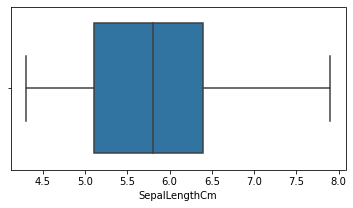

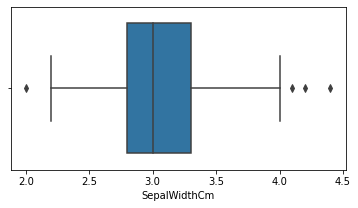

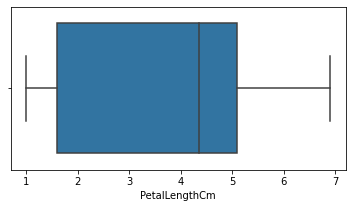

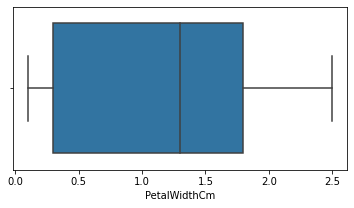

In [13]:
## Check for any outliers in the numeric data

for i in df.columns:
    if df[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(df[i])
        plt.show()

In [14]:
# correcting the oulier for SepalWidthCm column

q1,q3 = np.percentile(df['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
df['SepalWidthCm'] = df['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)

<AxesSubplot:xlabel='SepalWidthCm'>

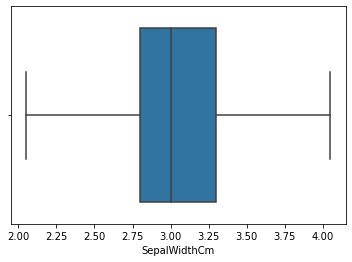

In [15]:
sns.boxplot(df['SepalWidthCm'])

In [16]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

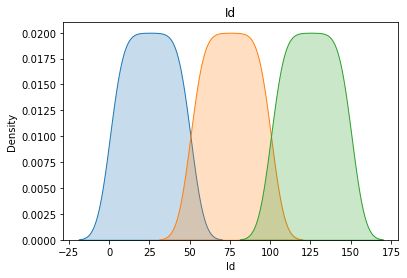

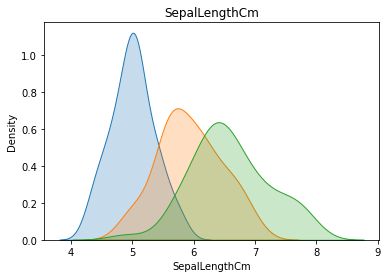

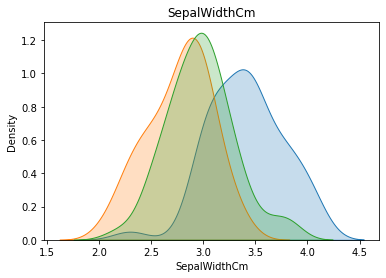

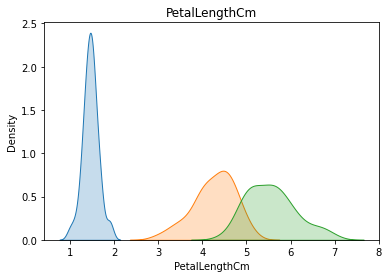

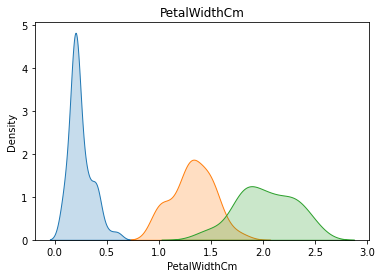

In [17]:
for i in df.columns[:-1]:
    
    sns.kdeplot(data = df.loc[df.Species=='Iris-setosa'][i], label="Iris-setosa", shade=True)
    
    sns.kdeplot(data = df.loc[df.Species=='Iris-versicolor'][i], label="Iris-versicolor", shade=True)

    sns.kdeplot(data = df.loc[df.Species=='Iris-virginica'][i], label="Iris-virginica", shade=True)

    plt.title(i);
    
    plt.show(i)

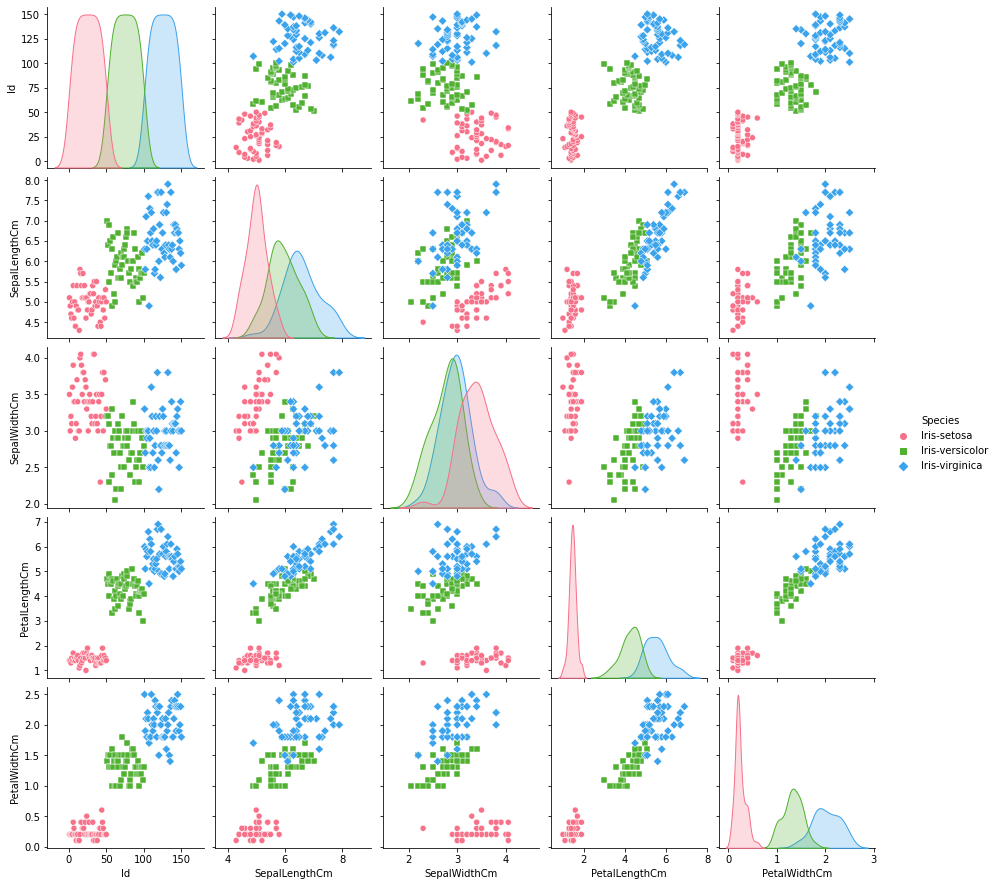

In [18]:
#sns.pairplot(iris)
sns.pairplot(df, hue="Species", palette="husl", markers=["o", "s", "D"])

### Finding the optimum number of clusters
Before clustering the data using kmeans, we need to specify number of clusters to find the optimum number of clusters. There are many methods available to fulfil this. In our case we are using Elbow method.

### Elbow Method

In [19]:
# calculating the within cluster sum of squre

SSE = []
cluster_range = range(1,15)
for i in cluster_range:
    kmeans = KMeans(n_jobs = -1, n_clusters = i, init='k-means++')
    kmeans.fit(iris_df)
    SSE.append(kmeans.inertia_)

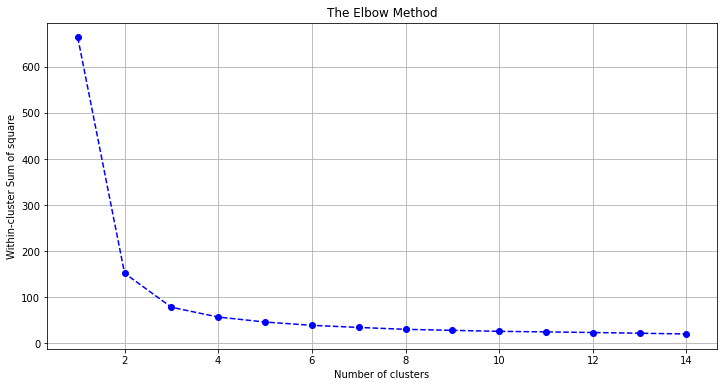

In [20]:
# Plotting the withing-cluster sum of sqaure range

data = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(data['Cluster'], data['SSE'], 'go--', color='blue')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of square');
plt.title("The Elbow Method");
plt.grid()
plt.show()

#### We can clearly see why its called elbow method as the optimmum clusters are where the elbow is created.

### Applying kmeans clustering on the data

In [21]:
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(iris_df)

In [22]:
# Here we can see the labels for the kmeans clustering
kmeans.labels_

array([ 1,  7,  7,  7,  1,  9,  7,  1,  7,  7,  9,  1,  7,  7,  9,  9,  9,
        1,  9,  9,  1,  1,  7,  1,  1,  1,  1,  1,  1,  7,  7,  1,  9,  9,
        1,  9,  7,  1,  1,  7,  7,  1,  9,  7,  9,  7,  9,  1,  6, 13,  6,
        2,  6,  5, 13,  8,  6,  5,  8,  5,  2, 13,  2,  6,  5,  2, 11,  2,
        0,  2, 11, 13, 13,  6,  6,  6, 13,  2,  2,  2,  2,  0,  5, 13,  6,
       11,  5,  2,  5, 13,  2,  8,  5,  5,  5, 13,  8,  5, 12,  0,  4,  3,
       12,  4,  5,  4,  3, 10,  3,  3,  3,  0,  0, 12,  3, 10,  4, 11, 12,
        0,  4,  0, 12,  4,  0,  0,  3,  4,  4, 10,  3,  0,  0,  4, 12,  3,
        0,  3, 12,  3, 12, 12,  3,  0,  3, 12,  0])

### Visualizing the clusters

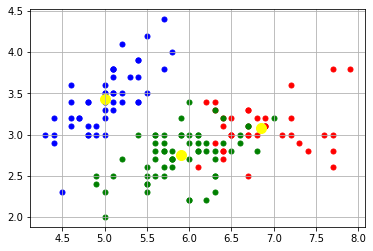

In [23]:
# allocating the labels and color to predicted values

x = iris_df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1], s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1], s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1], s = 25, c = 'green', label = 'Iris-virginica')

# plotting the cluster center

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.grid()
plt.show()

### Task Completed

### Thank You